In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [ ]:
train = pd.read_csv("train.csv")


test = pd.read_csv("test.csv")
print(test.head())


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [3]:
train_img = []

for i in range(len(train)):
  train_img.append(np.array(train.iloc[i, 1:]).reshape(28,28))

test_img = []
for i in range(len(test)):
  test_img.append(np.array(test.iloc[i, 0:]).reshape(28,28))


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

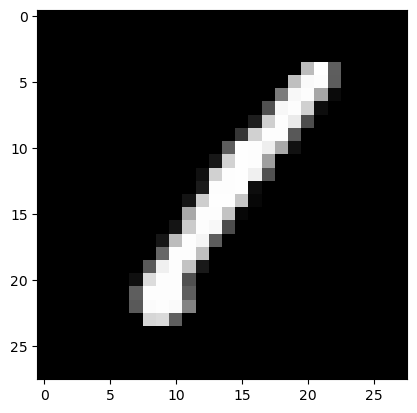

In [6]:
print(train_img[0])
plt.imshow(train_img[0], cmap="gray")
plt.show()

In [7]:
model = Sequential()
model.add(Conv2D(
  filters=16,
  kernel_size=(3,3),
  input_shape=(28,28,1),
  padding="same",
  activation = "relu"
))
model.add(Conv2D(
  filters=32,              
  kernel_size=(3, 3),      
  padding='same',          
  activation='relu'        
))
model.add(
    MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(
  filters=64,             
  kernel_size=(3, 3),      
  padding='same',          
  activation='relu'        
))

model.add(
    MaxPooling2D(pool_size=(2, 2)))   

model.add(Dropout(0.5))                 

model.add(Flatten())

model.add(Dense(128,                      
                activation='relu'         
               ))

model.add(Dense(10,                       
                activation='softmax'      
               ))

model.compile(
    loss='categorical_crossentropy',      
    optimizer=Adam(),                     
    metrics=['accuracy']                  
    )



In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)         

42000

In [19]:
from keras.utils import np_utils
x_train = np.array(train_img).reshape(len(train_img),28,28,1)
x_train = x_train.astype("float32")
x_train /= 255

correct = 10                        # 正解ラベルの数
# 正解ラベルを1-of-K符号化法で変換
y_train = np_utils.to_categorical(train.iloc[:,0], correct)

# テストデータ
# 10000x28x28の3次元配列を10000×28×28×1の4次元配列に変換
x_test = np.array(test_img).reshape(len(test_img),28,28,1)
x_test = x_test.astype('float32')  # float32型に変換
x_test /= 255                      # 0から1.0の範囲に変換

In [20]:
import time

# 学習を行って結果を出力
start = time.time()                   # プログラムの開始時刻を取得

history = model.ﬁt(x_train,           # 訓練データ
                   y_train,           # 正解ラベル 
                   batch_size=100,    # 勾配計算に用いるミニバッチの数 
                   epochs=20,         # 学習を繰り返す回数
                   verbose=1,         # 学習の進捗状況を出力する
                    )

# 処理にかかった時間を出力
print("Computation time:{0:.3f} sec".format(time.time() - start))

Epoch 1/20
420/420 [==============================] - 15s 34ms/step - loss: 0.2380 - accuracy: 0.9241
Epoch 2/20
420/420 [==============================] - 27s 66ms/step - loss: 0.0728 - accuracy: 0.9765
Epoch 3/20
420/420 [==============================] - 77s 184ms/step - loss: 0.0530 - accuracy: 0.9833
Epoch 4/20
420/420 [==============================] - 15s 35ms/step - loss: 0.0442 - accuracy: 0.9861
Epoch 5/20
420/420 [==============================] - 34s 81ms/step - loss: 0.0352 - accuracy: 0.9885
Epoch 6/20
420/420 [==============================] - 18s 43ms/step - loss: 0.0318 - accuracy: 0.9899
Epoch 7/20
420/420 [==============================] - 18s 42ms/step - loss: 0.0267 - accuracy: 0.9910
Epoch 8/20
420/420 [==============================] - 17s 41ms/step - loss: 0.0241 - accuracy: 0.9920
Epoch 9/20
420/420 [==============================] - 16s 38ms/step - loss: 0.0212 - accuracy: 0.9927
Epoch 10/20
420/420 [==============================] - 169s 404ms/step - loss: 0.

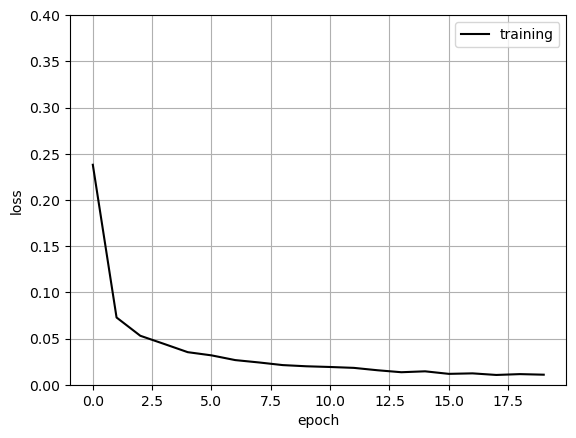

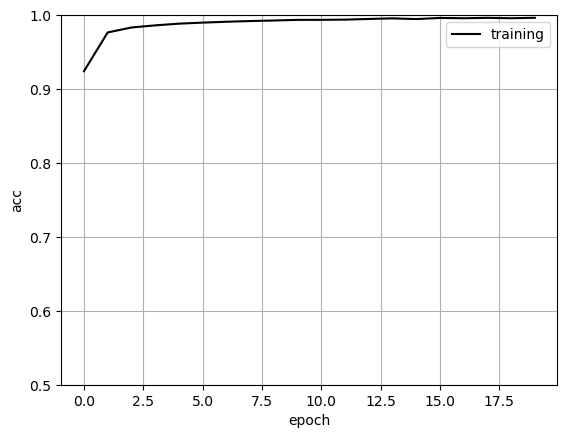

In [23]:
%matplotlib inline

# 訓練データの損失(誤り率)をプロット
plt.plot(history.history['loss'],
         label='training',
         color='black')
plt.ylim(0, 0.4)       # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル
plt.show()

# 訓練データの正解率をプロット
plt.plot(history.history['accuracy'],
         label='training',
         color='black')
plt.ylim(0.5, 1)     # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('acc')    # y軸ラベル
plt.show()

In [24]:
# モデルがすでに訓練されていると仮定
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
# 出力の確認
print(predicted_classes)

875/875 [==============================] - 5s 5ms/step
[2 0 9 ... 3 9 2]


range(0, 28000)

In [28]:
compare_result = pd.DataFrame({
    'ImageId': range(1, len(test.index)+1),
    'Label': predicted_classes
})

# CSV出力
compare_result.to_csv('submission.csv', index=False)